# Glaciating The Earth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

In [2]:
A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 1.6*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)

def Ys_cubic(ys):
    CubicTerms = (0.241*k*(aw-ai)*ys**3)/B + (0.241*3*0.5*(aw+ai)-0.241*3)*ys**2 - k*(aw-ai)*(1+0.241)*ys/B
    return CubicTerms

def Ys_cubic_consts(Q): 
    CubicConstTerms = k*(ai-1)/B + 1.241*ai/2 + 1.241*aw/2 - 1.241 + (Tc+A/B)*(B+k)/Q
    return CubicConstTerms

In [3]:
Ys_cubic(ys=0.93946) - Ys_cubic_consts(Q0)

5.217201280549588e-06

In [4]:
Qmin = (Tc + A/B)*(B+k)/((1 - aw)*(s(1) + k/B))
Qmax = (Tc + A/B)*(B+k)/((1 - ai)*(s(0) + k/B))
print("Min Q value for ice free", Qmin)
print("Max Q value for complete ice Earth", Qmax)

Min Q value for ice free 330.3616063989335
Max Q value for complete ice Earth 440.72694936919913


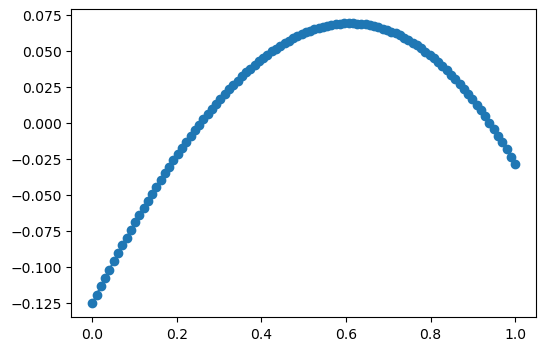

In [5]:
array = np.linspace(0, 1, 100)

cubicsol = Ys_cubic(array) - Ys_cubic_consts(Q0)
fig = plt.figure(figsize=(6,4))
plt.plot(array, cubicsol, '-o')

max_

In [6]:
ys = 0.93946

# Run the solver
fwd = lambda ys: Ys_cubic(ys) - Ys_cubic_consts(Q0)
sol = root(fwd, 0.9)
print(sol.message)
sol.x

The solution converged.


array([0.93947212])

In [ ]:
for Q0 in